In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score



In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_nul = df.isnull().sum()
df_nul = df_nul[df_nul>0]
df_nul.sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [6]:
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1, inplace=True)


In [7]:
print(df.shape)

(1460, 75)


In [8]:
df.isna().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

In [9]:
df.isnull().mean().sort_values(ascending=False).head(15)


LotFrontage     0.177397
GarageYrBlt     0.055479
GarageQual      0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
LandSlope       0.000000
LotConfig       0.000000
dtype: float64

In [10]:
df.dropna(axis=0, inplace=True)


In [11]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
print(df.shape)

(1094, 75)


In [13]:
df_num = df.select_dtypes(exclude = ["object"])

<Axes: title={'center': 'Correlation matrix of Sale Price'}>

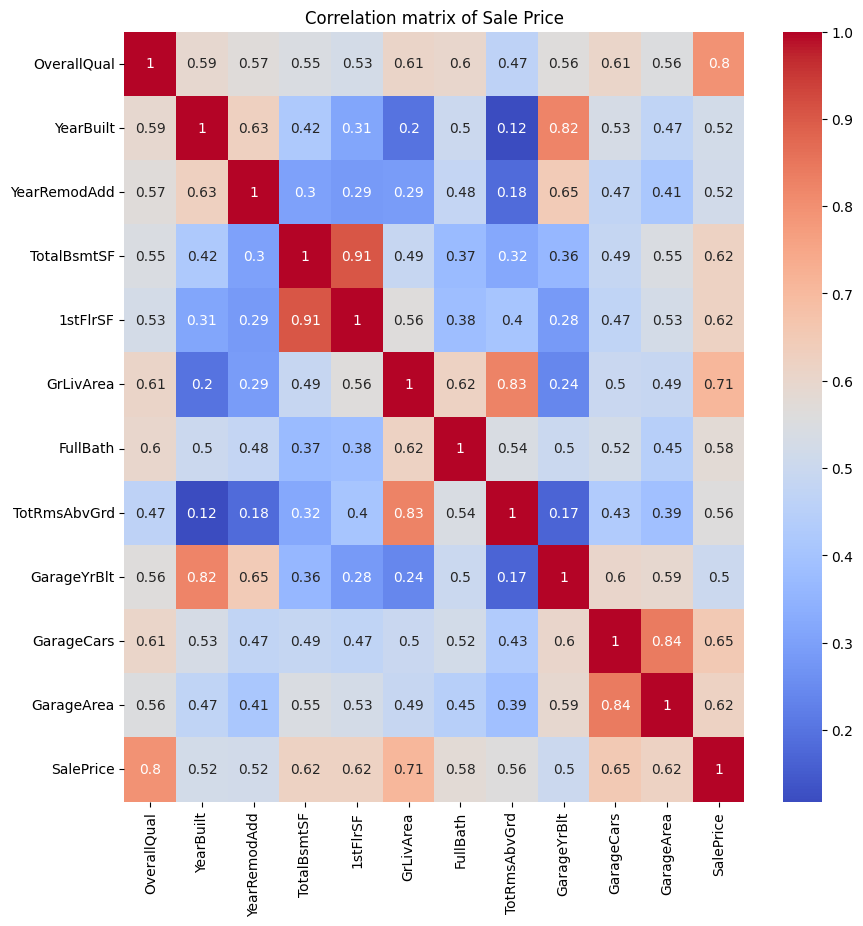

In [14]:
corrmat = df_num.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
plt.title("Correlation matrix of Sale Price")
sns.heatmap(df_num[top_corr_features].corr(), annot=True, cmap="coolwarm")


In [15]:
corr = df_num.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.795437
GrLivArea        0.707481
GarageCars       0.652103
GarageArea       0.620772
TotalBsmtSF      0.617741
1stFlrSF         0.617692
FullBath         0.578299
TotRmsAbvGrd     0.560521
YearBuilt        0.523434
YearRemodAdd     0.519806
GarageYrBlt      0.502248
MasVnrArea       0.485409
Fireplaces       0.458182
BsmtFinSF1       0.378678
LotFrontage      0.343978
OpenPorchSF      0.338600
WoodDeckSF       0.330286
2ndFlrSF         0.302569
LotArea          0.302268
HalfBath         0.259469
BsmtFullBath     0.223948
BsmtUnfSF        0.191247
BedroomAbvGr     0.168489
ScreenPorch      0.106479
PoolArea         0.092085
MoSold           0.052584
3SsnPorch        0.033947
LowQualFinSF    -0.003541
YrSold          -0.006723
MiscVal         -0.036001
BsmtFinSF2      -0.036923
BsmtHalfBath    -0.041341
Id              -0.047595
MSSubClass      -0.089478
KitchenAbvGr    -0.115382
OverallCond     -0.138511
EnclosedPorch   -0.161711
Name: SalePr

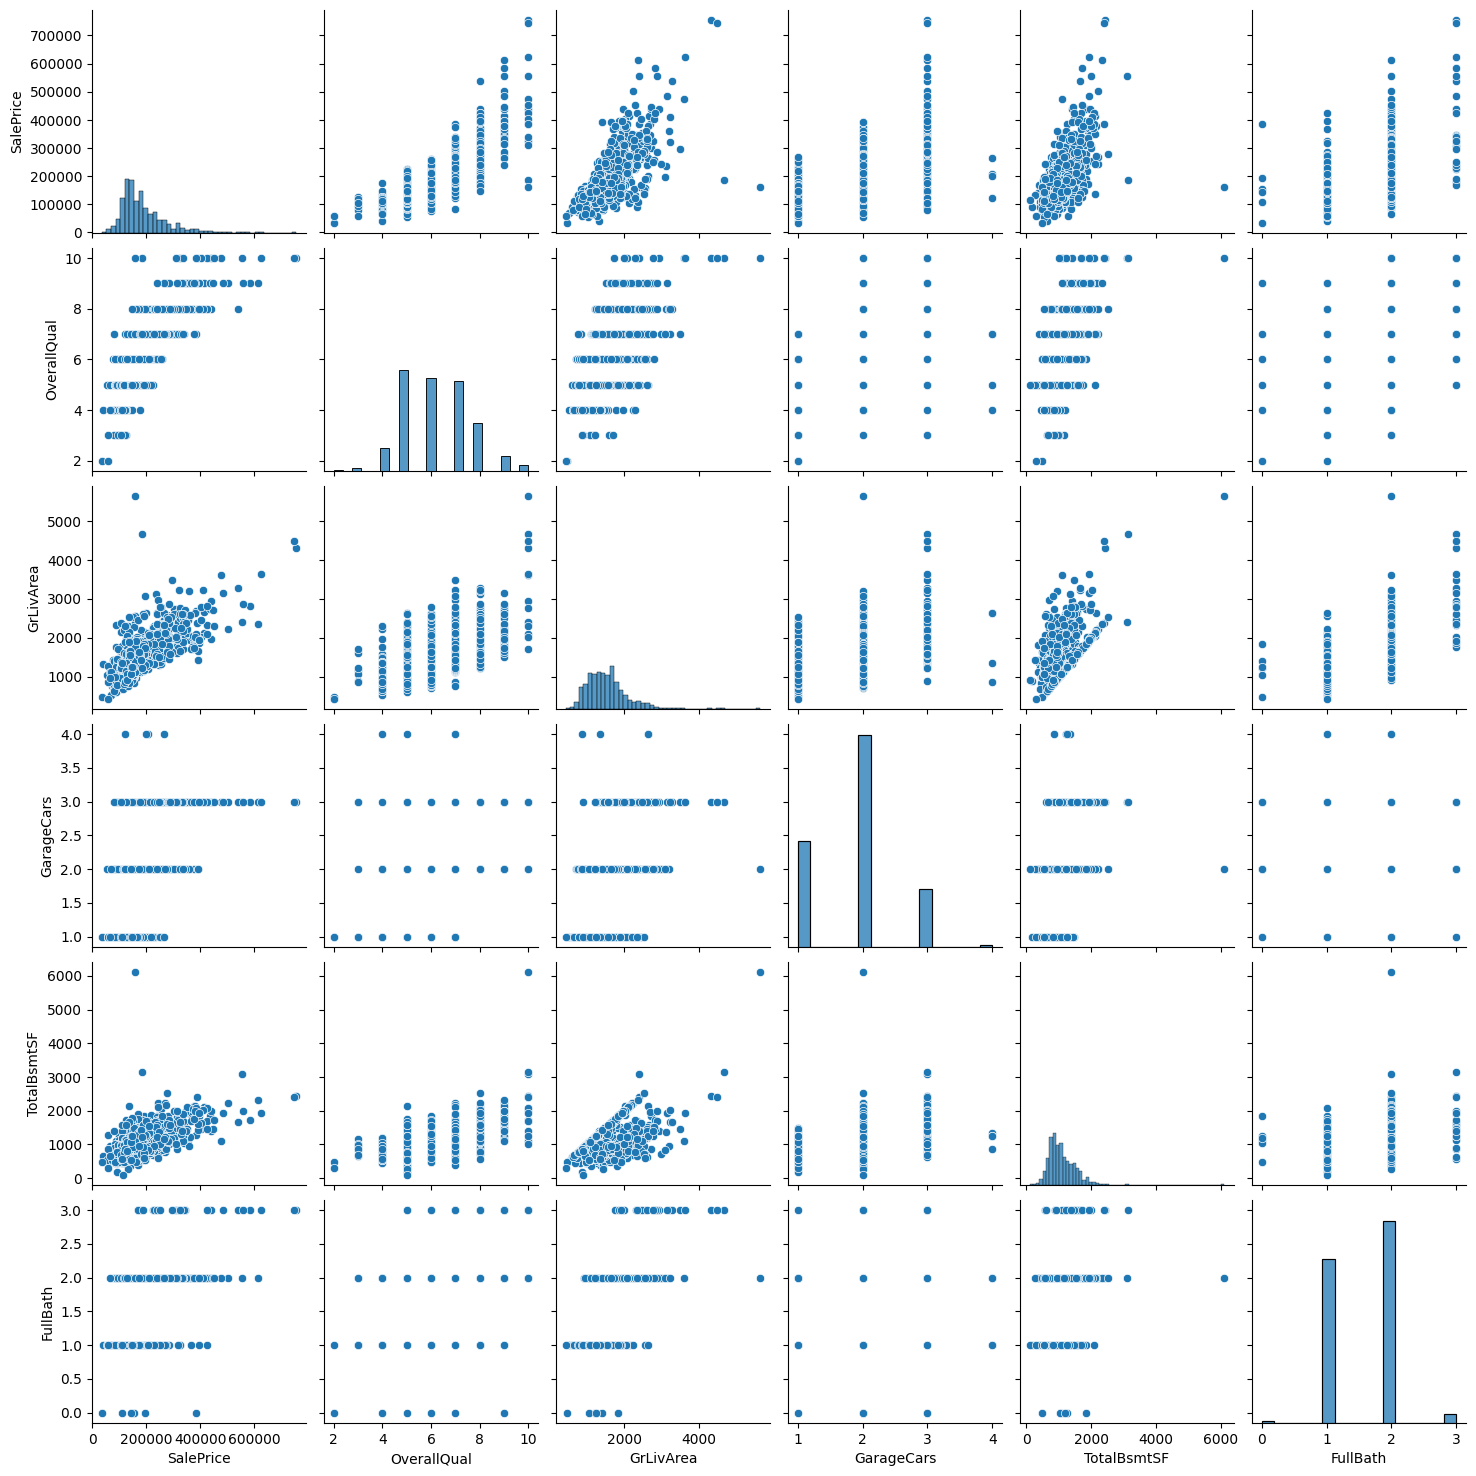

<Figure size 1000x1000 with 0 Axes>

In [16]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
sns.pairplot(df[cols])
plt.figure(figsize=(10,10))
plt.show();

In [17]:
df_train = df_num.iloc[:547]
df_test = df_num.iloc[547:]
df_train.shape

(547, 38)

In [18]:
X_train = df_train.drop(["Id", "SalePrice"], axis=1).values
y_train = df_train.values
X_test = df_test.drop("Id", axis=1).values


<Axes: >

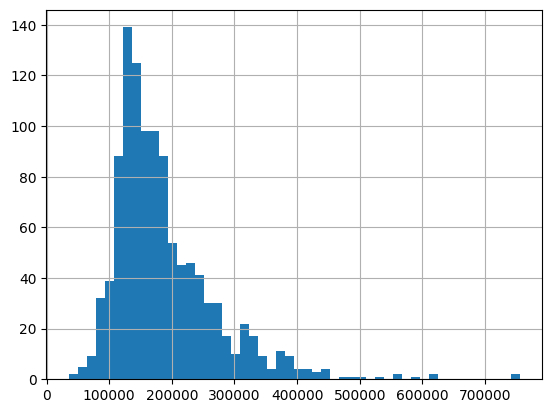

In [19]:
data_fix = df.copy()
data_fix.SalePrice.hist(bins=50)

In [20]:
from sklearn.model_selection import train_test_split

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [21]:
from sklearn.model_selection import GridSearchCV

linreg = LinearRegression()
parameters_lin = {"fit_intercept" : [True, False], "copy_X" : [True, False]}
grid_linreg = GridSearchCV(linreg, parameters_lin, verbose=1 , scoring = "r2")
grid_linreg.fit(X_training, y_training)

print("Best LinReg Model: " + str(grid_linreg.best_estimator_))
print("Best Score: " + str(grid_linreg.best_score_))




Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best LinReg Model: LinearRegression(fit_intercept=False)
Best Score: 0.9431541794827183


Text(0.5, 1.0, 'Linear Regression: Actual vs Predicted (Validation Set)')

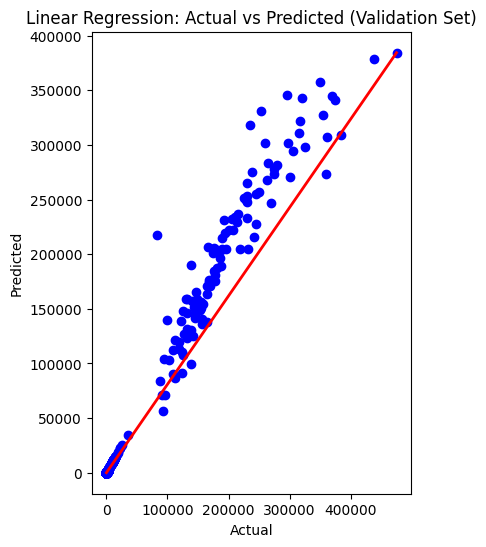

In [22]:
from sklearn.metrics import mean_squared_error

y_pred_valid = grid_linreg.predict(X_valid)
y_pred_train = grid_linreg.predict(X_training)

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_valid, y_pred_valid, color='blue')
plt.plot([np.min(y_valid), np.max(y_valid)], [np.min(y_pred_valid), np.max(y_pred_valid)], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted (Validation Set)')


Text(0.5, 1.0, 'Linear Regression: Actual vs Predicted (Training Set)')

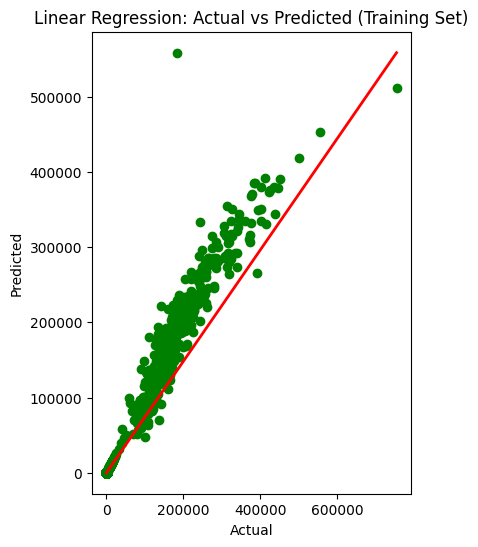

In [23]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)

plt.scatter(y_training, y_pred_train, color='green')
plt.plot([np.min(y_training), np.max(y_training)], [np.min(y_pred_train), np.max(y_pred_train)], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted (Training Set)')


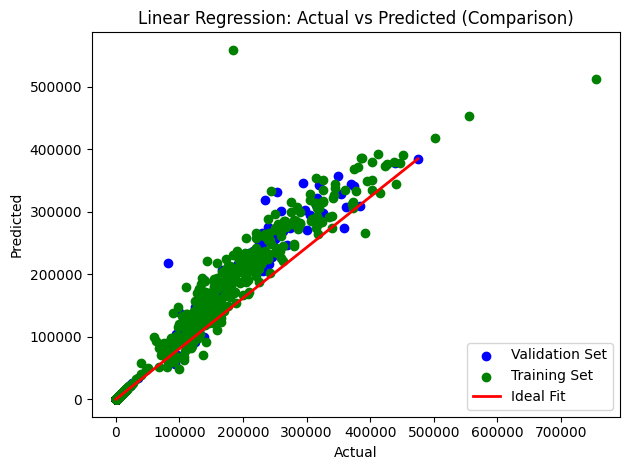

In [24]:

plt.scatter(y_valid, y_pred_valid, color='blue', label='Validation Set')
plt.scatter(y_training, y_pred_train, color='green', label='Training Set')
plt.plot([np.min(y_valid), np.max(y_valid)], [np.min(y_pred_valid), np.max(y_pred_valid)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted (Comparison)')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
rmse_valid = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
rmse_train = np.sqrt(mean_squared_error(y_training, y_pred_train))
print("Validation RMSE: ", rmse_valid)
print("Training RMSE: ", rmse_train)

Validation RMSE:  4940.166524612019
Training RMSE:  5531.46171571682


In [26]:
#EXPERIMENT 2

In [27]:
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.23, random_state=0)


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
scaler = StandardScaler()
X_training = scaler.fit_transform(X_training)
X_valid = scaler.transform(X_valid)


In [29]:
ridge = Ridge()
parameters_ridge = {"alpha": [0.1, 1.0, 10.0, 100.0], "fit_intercept": [True, False]}
grid_ridge = GridSearchCV(ridge, parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_training, y_training)

print("Best Ridge Model: " + str(grid_ridge.best_estimator_))
print("Best Score: " + str(grid_ridge.best_score_))



Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Ridge Model: Ridge()
Best Score: 0.9478072110505685


In [30]:
y_pred_valid = grid_ridge.predict(X_valid)
y_pred_train = grid_ridge.predict(X_training)

rmse_valid = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
print("Validation RMSE: ", rmse_valid)
rmse_train = np.sqrt(mean_squared_error(y_training, y_pred_train))
print("Training RMSE: ", rmse_train)

Validation RMSE:  4771.647219004788
Training RMSE:  5602.680797634728


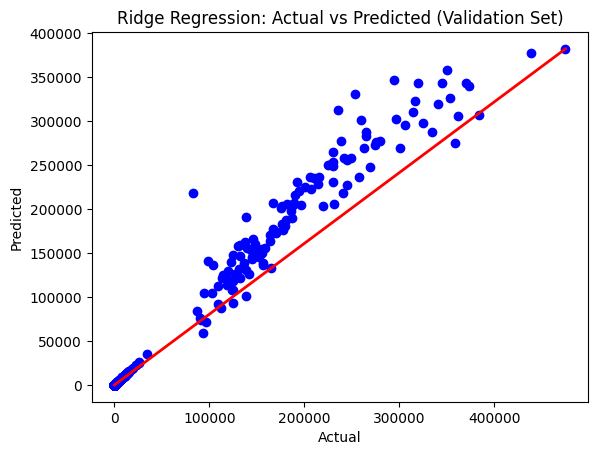

In [31]:
plt.scatter(y_valid, y_pred_valid, color='blue')
plt.plot([np.min(y_valid), np.max(y_valid)], [np.min(y_pred_valid), np.max(y_pred_valid)], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted (Validation Set)')
plt.show()

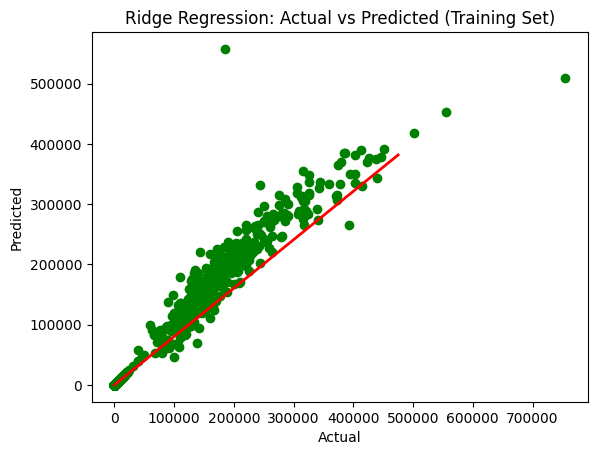

In [32]:
plt.scatter(y_training, y_pred_train, color='green')
plt.plot([np.min(y_valid), np.max(y_valid)], [np.min(y_pred_valid), np.max(y_pred_valid)], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted (Training Set)')
plt.show()


In [33]:
#EXPERIMENT 3

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.06, random_state=39)

In [35]:
scaler = StandardScaler()
X_training = scaler.fit_transform(X_training)
X_valid = scaler.transform(X_valid)


In [36]:
ridge = Ridge(max_iter=10000)
parameters_ridge = {"alpha": [0.2, 1.0, 10.0, 100.0], "fit_intercept": [True, False]}
grid_ridge = GridSearchCV(ridge, parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_training, y_training)

print("Best Ridge Model: " + str(grid_ridge.best_estimator_))
print("Best Score: " + str(grid_ridge.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Ridge Model: Ridge(max_iter=10000)
Best Score: 0.9501288987597025


In [37]:
y_pred_valid = grid_ridge.predict(X_valid)
y_pred_train = grid_ridge.predict(X_training)

rmse_valid = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
rmse_train = np.sqrt(mean_squared_error(y_training, y_pred_train))
print("Validation RMSE: ", rmse_valid)
print("Training RMSE: ", rmse_train)

Validation RMSE:  6710.3215468781045
Training RMSE:  5314.247629916072


Text(0.5, 1.0, 'Ridge Regression 2: Actual vs Predicted (Validation Set)')

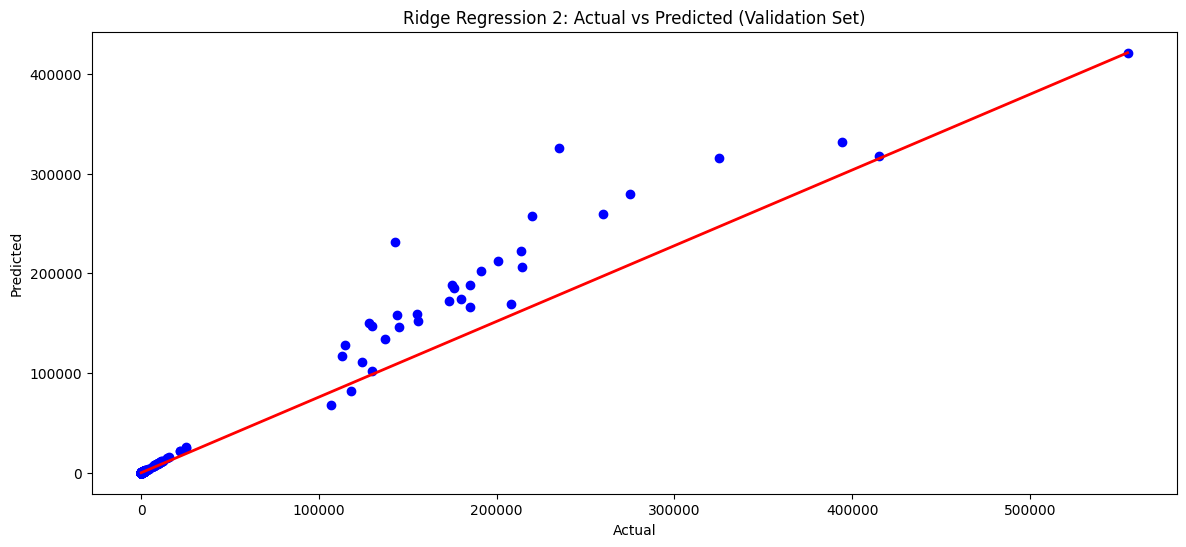

In [38]:
plt.figure(figsize=(14, 6))

plt.scatter(y_valid, y_pred_valid, color='blue')
plt.plot([np.min(y_valid), np.max(y_valid)], [np.min(y_pred_valid), np.max(y_pred_valid)], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression 2: Actual vs Predicted (Validation Set)')

Text(0.5, 1.0, 'Ridge Regression 2: Actual vs Predicted (Training Set)')

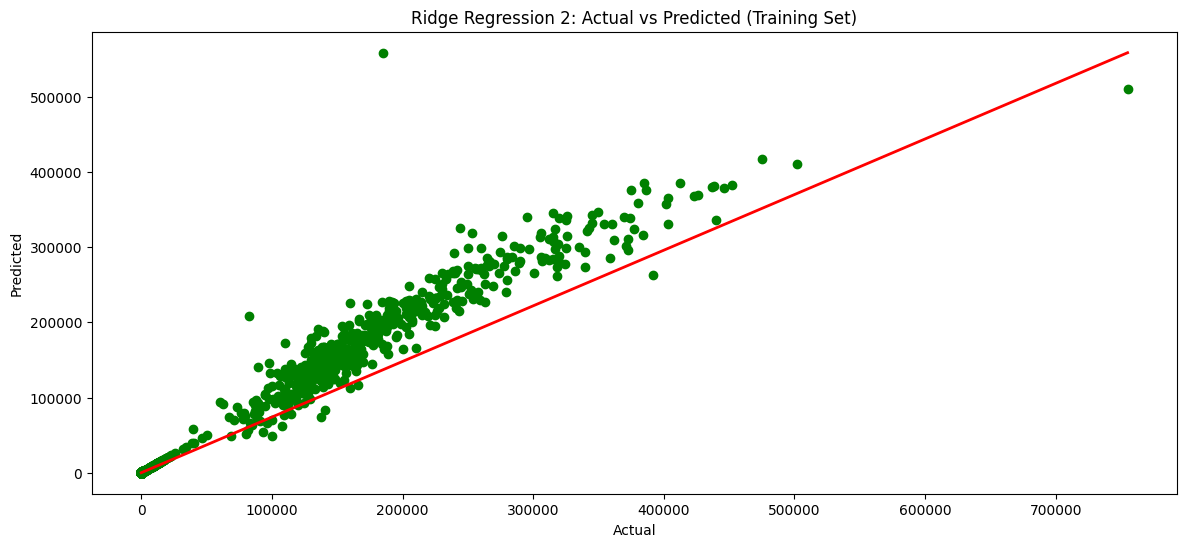

In [39]:
plt.figure(figsize=(14, 6))

plt.scatter(y_training, y_pred_train, color='green')
plt.plot([np.min(y_training), np.max(y_training)], [np.min(y_pred_train), np.max(y_pred_train)], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression 2: Actual vs Predicted (Training Set)')


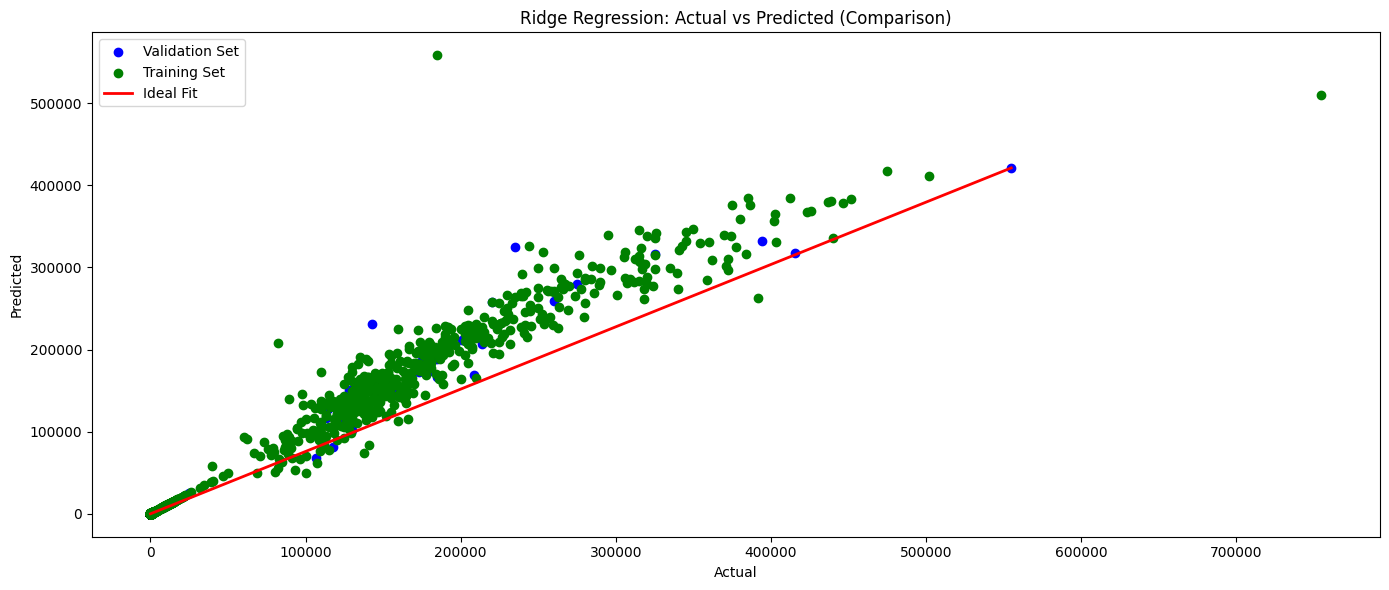

In [40]:
plt.figure(figsize=(14, 6))

plt.scatter(y_valid, y_pred_valid, color='blue', label='Validation Set')
plt.scatter(y_training, y_pred_train, color='green', label='Training Set')
plt.plot([np.min(y_valid), np.max(y_valid)], [np.min(y_pred_valid), np.max(y_pred_valid)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted (Comparison)')
plt.legend()

plt.tight_layout()
plt.show()


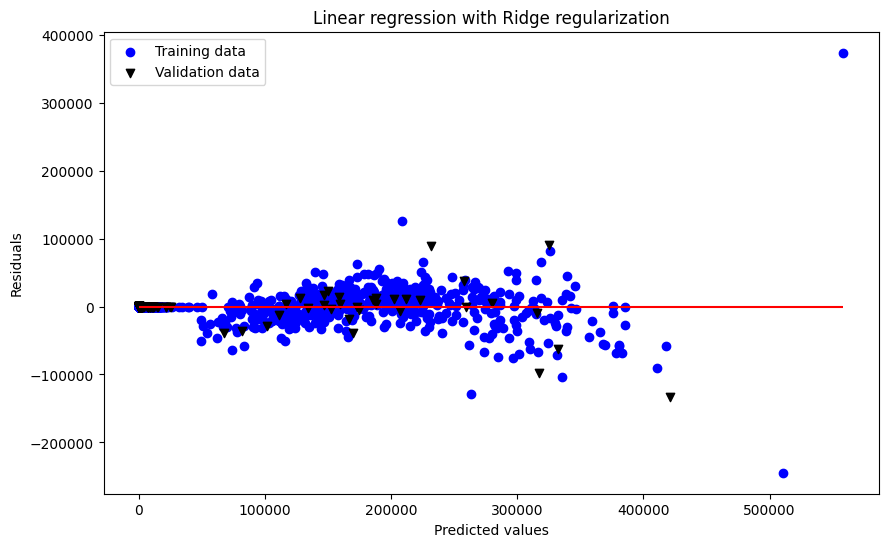

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train, y_pred_train - y_training, c="blue", label="Training data")
plt.scatter(y_pred_valid, y_pred_valid - y_valid, c="black", marker="v", label="Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=min(np.min(y_pred_train), np.min(y_pred_valid)), xmax=max(np.max(y_pred_train), np.max(y_pred_valid)), color="red")
plt.show()